In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from tensorflow.keras.models import load_model

In [2]:
ref_image1 = cv2.imread('./090523_checkerboard_2/left/Left_7850nm.png',0)
ref_image2 = cv2.imread('./090523_checkerboard_2/right/Right_7850nm.png',0)

CHECKERBOARD = (6,7)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001) #maxiter = 30, epsilon = 0.0001

objp = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
# Defining checkerboard dimensions and size in real world coordinates (in mm)
objp = objp*4.235 + [[[4.235, 4.235, 0]]]
objp = objp.astype('float32')
objp

array([[[ 4.235   ,  4.235   ,  0.      ],
        [ 8.47    ,  4.235   ,  0.      ],
        [12.705   ,  4.235   ,  0.      ],
        [16.94    ,  4.235   ,  0.      ],
        [21.175001,  4.235   ,  0.      ],
        [25.410002,  4.235   ,  0.      ],
        [ 4.235   ,  8.47    ,  0.      ],
        [ 8.47    ,  8.47    ,  0.      ],
        [12.705   ,  8.47    ,  0.      ],
        [16.94    ,  8.47    ,  0.      ],
        [21.175001,  8.47    ,  0.      ],
        [25.410002,  8.47    ,  0.      ],
        [ 4.235   , 12.705   ,  0.      ],
        [ 8.47    , 12.705   ,  0.      ],
        [12.705   , 12.705   ,  0.      ],
        [16.94    , 12.705   ,  0.      ],
        [21.175001, 12.705   ,  0.      ],
        [25.410002, 12.705   ,  0.      ],
        [ 4.235   , 16.94    ,  0.      ],
        [ 8.47    , 16.94    ,  0.      ],
        [12.705   , 16.94    ,  0.      ],
        [16.94    , 16.94    ,  0.      ],
        [21.175001, 16.94    ,  0.      ],
        [25

# Left Camera Calibration

In [3]:
objpoints1 = []
imgpoints1 = []

img = cv2.imread("./090523_checkerboard_2/left/Left_7850nm.png", 0)
ret, corners = cv2.findChessboardCorners(img, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

print(ret)
print("")
if ret == True:
    objpoints1.append(objp)
    # refining pixel coordinates for given 2d points.
    corners2 = cv2.cornerSubPix(img, corners, (5,5),(-1,-1), criteria)
         
    imgpoints1.append(corners2)
 
    # Draw and display the corners
    img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)

images = glob.glob('./090523_checkerboard_2/left/Left*850nm.png')
for fname in images:
    img = cv2.imread(fname, 0)
#     gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(img, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
    
    print(ret)
    """
    If desired number of corner are detected,
    we refine the pixel coordinates and display 
    them on the images of checker board
    """
    if ret == True:
        objpoints1.append(objp)
        # refining pixel coordinates for given 2d points.
        corners2 = cv2.cornerSubPix(img, corners, (11,11),(-1,-1), criteria)
         
        imgpoints1.append(corners2)
 
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
        
#         cv2.imshow('img', img)
#         cv2.waitKey(0)

#         cv2.destroyAllWindows()

True

True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [4]:
        """
        Performing camera calibration by 
        passing the value of known 3D points (objpoints)
        and corresponding pixel coordinates of the 
        detected corners (imgpoints)
        """
ret1, mtx1, dist1, rvecs1, tvecs1 = cv2.calibrateCamera(objpoints1, imgpoints1, ref_image1.shape[::-1], None, None)

print(" ")
print("Reprojection error : \n")
print(ret1)
print("Camera matrix : \n")
print(mtx1)
print("dist : \n")
print(dist1)
print("rvecs : \n")
print(rvecs1)
print("tvecs : \n")
print(tvecs1)

 
Reprojection error : 

0.54484397125064
Camera matrix : 

[[2.32587232e+03 0.00000000e+00 6.28543888e+02]
 [0.00000000e+00 2.30747879e+03 4.97033408e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist : 

[[-3.50134727e-02 -4.58849020e-01  1.70641568e-03 -1.59442064e-02
   2.41463160e+00]]
rvecs : 

(array([[ 0.16403378],
       [-0.18201366],
       [-1.57871643]]), array([[ 0.17518107],
       [-0.18891205],
       [-1.59621362]]), array([[ 0.14544275],
       [-0.20217223],
       [-1.55702238]]), array([[ 0.14815337],
       [-0.18011092],
       [-1.53873457]]), array([[ 0.15906228],
       [-0.17926177],
       [-1.55145347]]), array([[ 0.15402854],
       [-0.1751828 ],
       [-1.51810086]]), array([[ 0.15440945],
       [-0.17924989],
       [-1.52981453]]), array([[ 0.15465482],
       [-0.19107142],
       [-1.51710261]]), array([[-0.00646408],
       [ 0.03622175],
       [-1.66594644]]), array([[-0.03832134],
       [ 0.01964105],
       [-1.5560515 ]]), array([[-

In [7]:
#undistortion
img = cv2.imread('./Left_Sample850nm.png')
h,  w = img.shape[:2]
newcameramtx1, roi = cv2.getOptimalNewCameraMatrix(mtx1, dist1, (w,h), 1, (w,h))

# undistort
dst = cv2.undistort(img, mtx1, dist1, None, newcameramtx1)
dst = cv2.resize(dst, (0,0), fx = 0.5, fy = 0.5)

cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
#reprojection error
mean_error = 0
for i in range(len(objpoints1)):
    imgpoints2_, _ = cv2.projectPoints(objpoints1[i], rvecs1[i], tvecs1[i], mtx1, dist1)
    error = cv2.norm(imgpoints1[i], imgpoints2_, cv2.NORM_L2)/len(imgpoints2_)
    mean_error += error
print( "total error: {}".format(mean_error/len(objpoints1)) )

total error: 0.08359020653815628


# Right Camera Calibration

In [9]:
objpoints2 = []
imgpoints2 = []

img = cv2.imread("./090523_checkerboard_2/right/Right_7850nm.png", 0)
ret, corners = cv2.findChessboardCorners(img, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

print(ret)
print("")
if ret == True:
    objpoints2.append(objp)
    # refining pixel coordinates for given 2d points.
    corners2 = cv2.cornerSubPix(img, corners, (5,5),(-1,-1), criteria)
         
    imgpoints2.append(corners2)
 
    # Draw and display the corners
    img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)



images = glob.glob("./090523_checkerboard_2/right/Right_*850nm.png")
for fname in images:
    img = cv2.imread(fname, 0)
#     gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(img, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
    
    print(ret)
    """
    If desired number of corner are detected,
    we refine the pixel coordinates and display 
    them on the images of checker board
    """
    if ret == True:
        objpoints2.append(objp)
        # refining pixel coordinates for given 2d points.
        corners2 = cv2.cornerSubPix(img, corners, (5,5),(-1,-1), criteria)
         
        imgpoints2.append(corners2)
 
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
        
#         cv2.imshow('img', img)
#         cv2.waitKey(0)

#         cv2.destroyAllWindows()

True

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [12]:
        """
        Performing camera calibration by 
        passing the value of known 3D points (objpoints)
        and corresponding pixel coordinates of the 
        detected corners (imgpoints)
        """
ret2, mtx2, dist2, rvecs2, tvecs2 = cv2.calibrateCamera(objpoints2, imgpoints2, ref_image2.shape[::-1], None, None)

print(" ")
print("Reprojection error : \n")
print(ret2)
print("Camera matrix : \n")
print(mtx2)
print("dist : \n")
print(dist2)
print("rvecs : \n")
print(rvecs2)
print("tvecs : \n")
print(tvecs2)

 
Reprojection error : 

0.6549208076769176
Camera matrix : 

[[1.98478174e+03 0.00000000e+00 9.42853845e+02]
 [0.00000000e+00 1.96251293e+03 5.21173891e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist : 

[[-0.07695426 -0.19222939 -0.0005675   0.01007321  0.38877773]]
rvecs : 

(array([[-0.16643782],
       [ 0.16061895],
       [-1.57448358]]), array([[-0.16168304],
       [ 0.18072974],
       [-1.54822093]]), array([[-0.11296541],
       [ 0.15152649],
       [-1.56005553]]), array([[-0.3716547 ],
       [ 0.35617825],
       [-1.52485742]]), array([[-0.35825922],
       [ 0.36255168],
       [-1.53051063]]), array([[-0.24797383],
       [ 0.36727142],
       [-1.57062422]]), array([[-0.32926398],
       [ 0.34224034],
       [-1.57439089]]), array([[-0.35831919],
       [ 0.34065143],
       [-1.6064864 ]]), array([[-0.39030986],
       [ 0.37167951],
       [-1.68671837]]), array([[-0.42030086],
       [ 0.38074645],
       [-1.54458193]]), array([[-0.37519426],
       

In [13]:
#undistortion
img = cv2.imread('./Right_Sample850nm.png')
h,  w = img.shape[:2]
newcameramtx2, roi = cv2.getOptimalNewCameraMatrix(mtx2, dist2, (w,h), 1, (w,h))

# undistort
dst = cv2.undistort(img, mtx2, dist2, None, newcameramtx2)
dst = cv2.resize(dst, (0,0), fx = 0.5, fy = 0.5)

cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
#reprojection error
mean_error = 0
for i in range(len(objpoints2)):
    imgpoints2_, _ = cv2.projectPoints(objpoints2[i], rvecs2[i], tvecs2[i], mtx2, dist2)
    error = cv2.norm(imgpoints2[i], imgpoints2_, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error
print( "total error: {}".format(mean_error/len(objpoints2)) )

total error: 0.13815327029566132


#  

# Keypoint Detection

1/1 [==============================] - 1s 1s/step


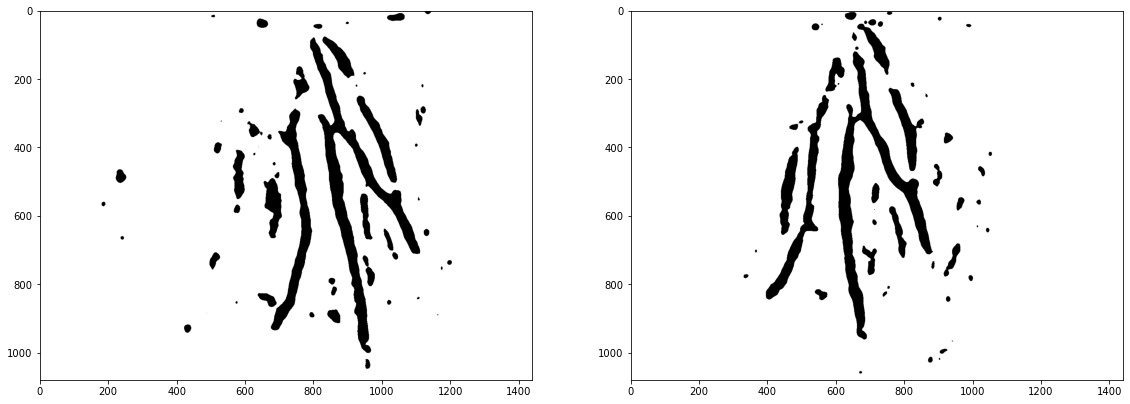

In [24]:
vein_l = cv2.imread(r"./vein_images/Left_Vein01850nm.png",0)
vein_r = cv2.imread(r"./vein_images/Right_Vein01850nm.png",0)

vein_l = cv2.undistort(vein_l,mtx1,dist1,None,newcameramtx1)
vein_r = cv2.undistort(vein_r,mtx2,dist2,None,newcameramtx2)

autoencoder_vein = load_model("./server output h5 file/trial_error_vein_train12.h5")

vein_l_input = vein_l.reshape((1,1080, 1440,1)).astype('float32') / 255.
vein_r_input = vein_r.reshape((1,1080, 1440,1)).astype('float32') / 255.

vein_proc_l = autoencoder_vein.predict(vein_l_input)
vein_proc_l = (vein_proc_l.reshape((1080, 1440)) * 255 ).astype('uint8')
vein_proc_r = autoencoder_vein.predict(vein_r_input)
vein_proc_r = (vein_proc_r.reshape((1080, 1440)) * 255 ).astype('uint8')

vein_proc_l = cv2.GaussianBlur(vein_proc_l,(25,25),0)
vein_proc_r = cv2.GaussianBlur(vein_proc_r,(25,25),0)

vein_proc_l = cv2.adaptiveThreshold(vein_proc_l, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 305, 5)
vein_proc_r = cv2.adaptiveThreshold(vein_proc_r, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 305, 5)

clahe = cv2.createCLAHE(clipLimit = 8)

feat1 = clahe.apply(vein_l)
feat2 = clahe.apply(vein_r)

plt.figure(figsize=(30,10))

ax = plt.subplot(1,3,1)

plt.imshow(vein_proc_l,cmap='gray')
# plt.imshow(feat1,cmap='gray')

# target image

ax = plt.subplot(1,3,2)
plt.imshow(vein_proc_r,cmap='gray')
# plt.imshow(feat2,cmap='gray')

In [25]:
#scaling down the images
scale = 1
widthl = int(feat1.shape[1]/scale)
heightl = int(feat1.shape[0]/scale)
diml = (widthl, heightl)
img1 = cv2.resize(feat1, diml, cv2.INTER_AREA)

widthr = int(feat2.shape[1]/scale)
heightr = int(feat2.shape[0]/scale)
dimr = (widthr, heightr)
img2 = cv2.resize(feat2, dimr, cv2.INTER_AREA)

In [26]:
orb = cv2.ORB_create()

KeyPoints1, des1 = orb.detectAndCompute(img1, None)
KeyPoints2, des2 = orb.detectAndCompute(img2, None)

In [27]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING2, crossCheck= True)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)
len(matches)

72

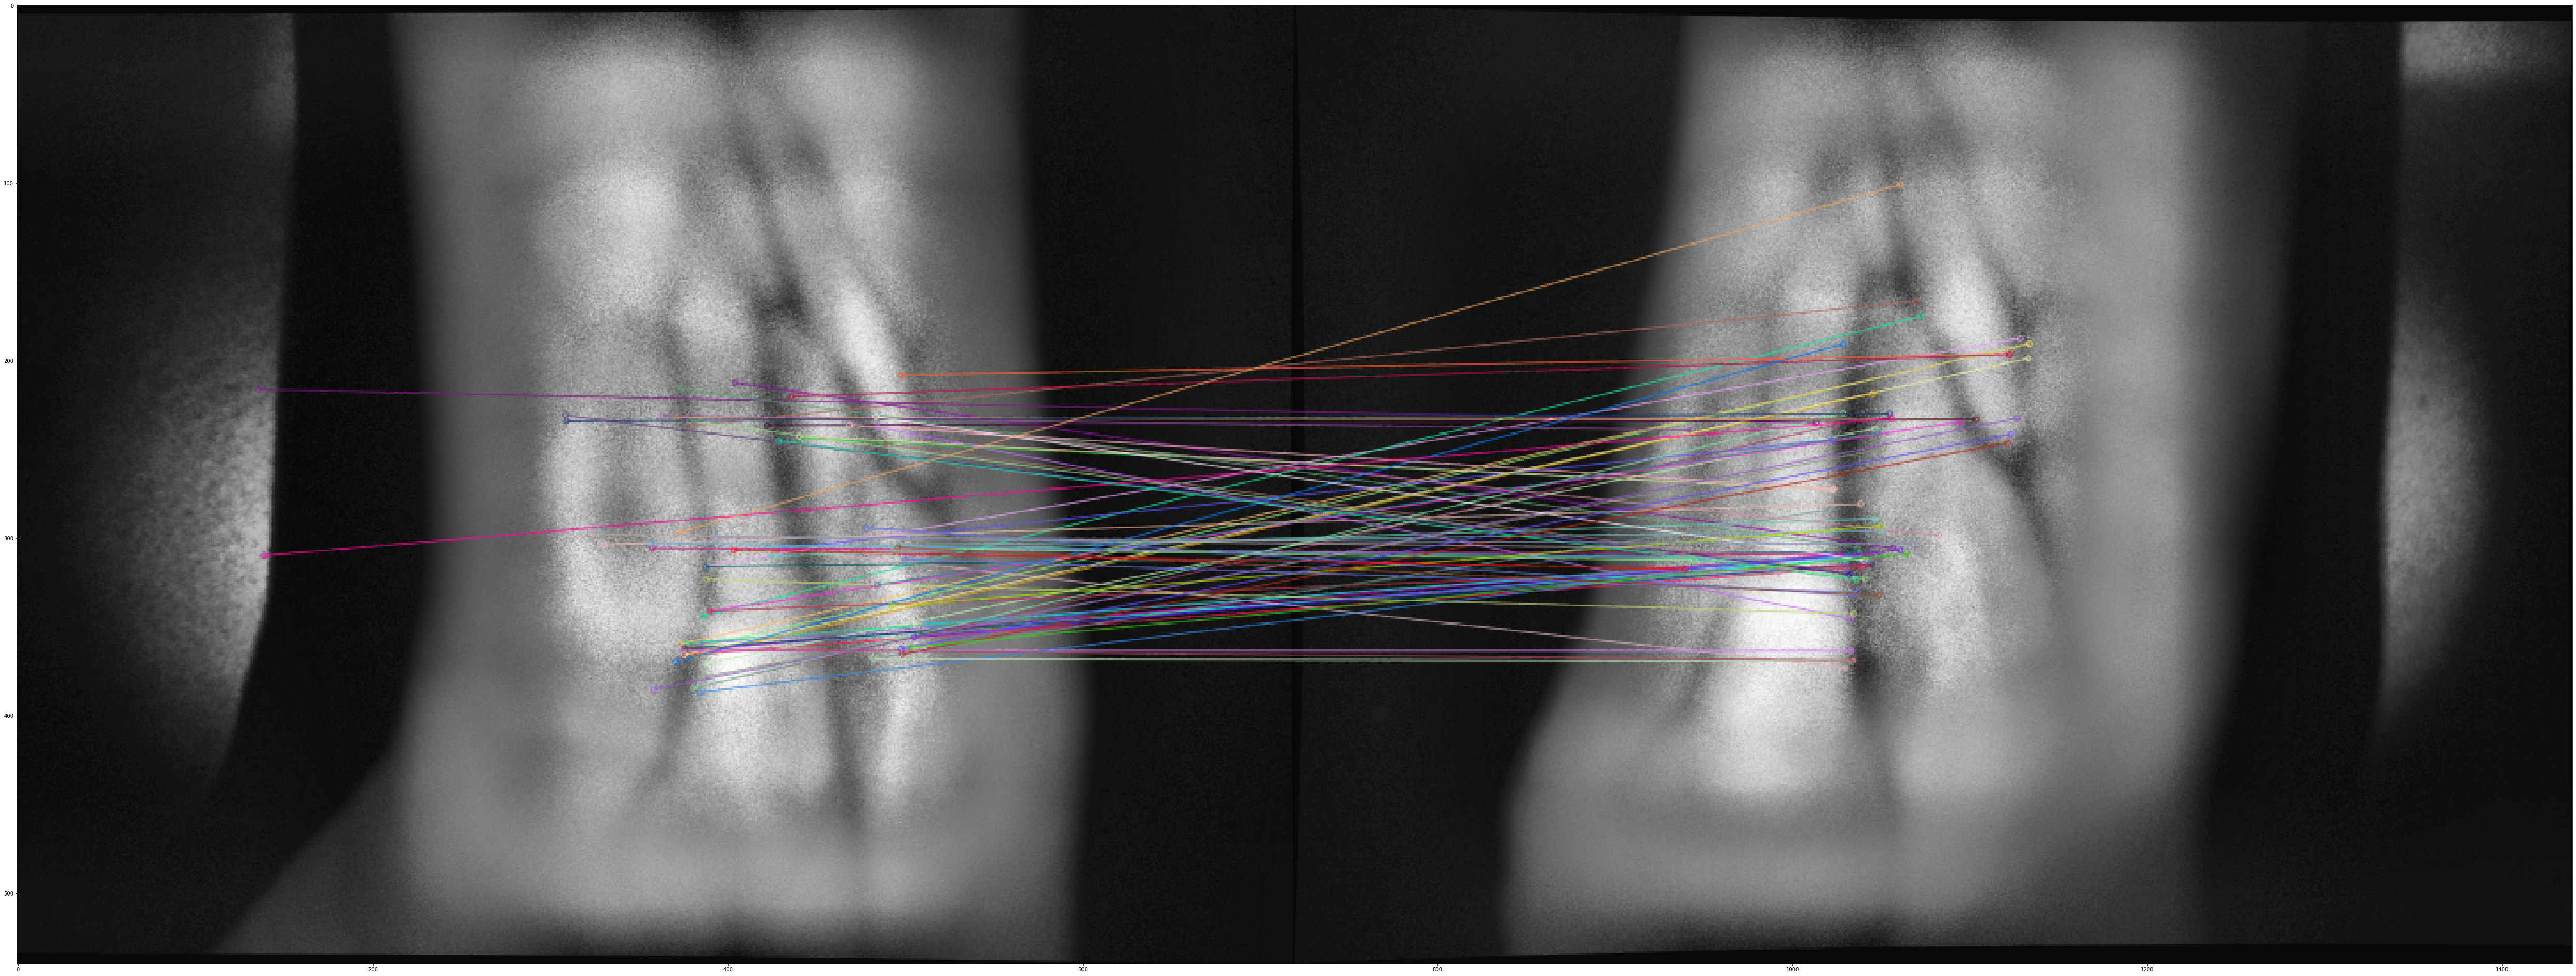

In [28]:
matching_result = cv2.drawMatches(img1, KeyPoints1, img2, KeyPoints2, matches, None, flags=2)

mr = cv2.resize(matching_result, (0, 0), fx = 0.5, fy = 0.5)
plt.figure(figsize=(300,100))
ax = plt.subplot(1,3,1)
plt.imshow(mr, cmap = 'gray')

p1=[]
p2=[]
for match in matches:
    p1.append([KeyPoints1[match.queryIdx].pt])
    p2.append([KeyPoints2[match.trainIdx].pt])

p1 = np.array(p1)
p2 = np.array(p2)

p1 = p1.reshape(p1.shape[0],2)
p2 = p2.reshape(p2.shape[0],2)

p1 = p1*scale
p2 = p2*scale

# Homography

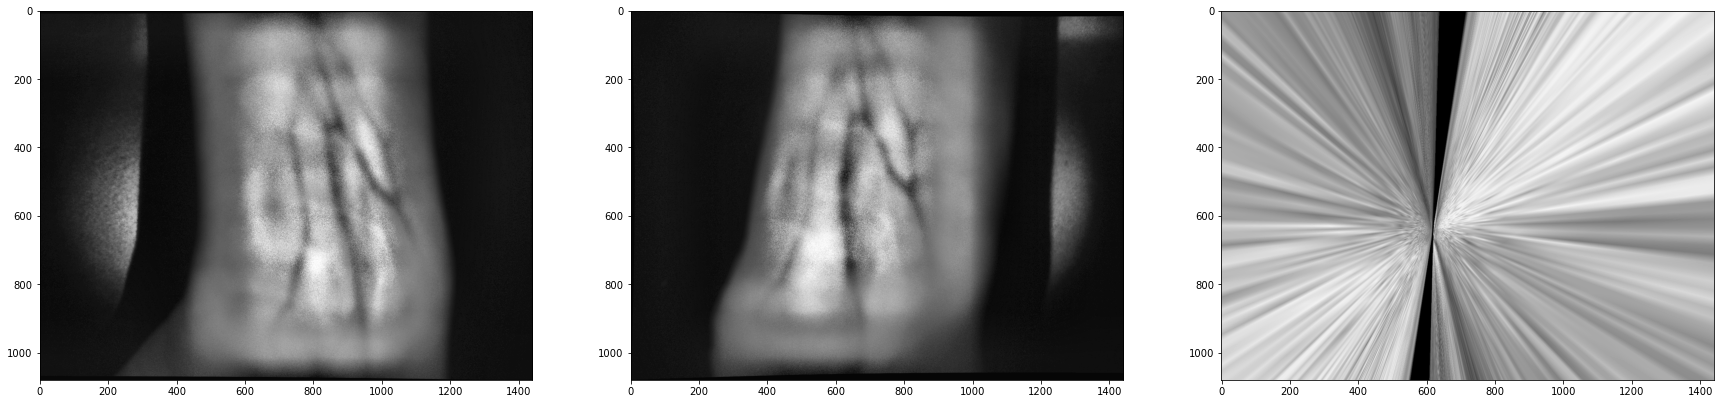

In [29]:
# Homography

h,status = cv2.findHomography(p1, p2, cv2.RANSAC, maxIters = 5, confidence = 0.999)

im_out = cv2.warpPerspective(img1,  h, (img1.shape[1],img1.shape[0]))

plt.figure(figsize=(30,10))

ax = plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')

# target image

ax = plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
cv2.imwrite('image_r.png', img2)

ax = plt.subplot(1,3,3)
plt.imshow(im_out,cmap='gray')
cv2.imwrite('homography_out.png', im_out)

im_out = cv2.resize(im_out,(1440,1080))

a_h = np.where(im_out==255)
a_h=np.array(a_h)

pa_h = []
for i in range(len(a_h[0])):
    pa_h32 = (a_h[0][i],a_h[1][i])
    pa_h.append(pa_h32)

pa_h = np.array(pa_h)

In [30]:
# Check the overlap
img1 = cv2.imread(r"./image_r.png")
img2 = cv2.imread(r"./homography_out.png")
dst = cv2.addWeighted(img1, 0.4, img2, 0.9, 0)

# img_arr = np.hstack((img1, img2))
# cv2.imshow('Input Images',img_arr)
cv2.imshow('Blended Image',dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Triangulation

In [ ]:
a = np.where(thresh1==255)
pa = []
for i in range(len(a[0])):
    p32 = (a[0][i],a[1][i])
#     print(p32)
    pa.append(p32)
pa = np.array(pa)
# pa

pa_h = []
for i in range(len(a[0])):
    pa_h32 = np.dot(h,(a[0][i],a[1][i], 1))
    pa_h32 = (pa_h32[0],pa_h32[1])
#     print(pa_h32)
    pa_h.append(pa_h32)
pa_h = np.asarray(pa_h)    

pa.shape

In [ ]:
rot1 = cv2.Rodrigues(rvecsl[0])
rot2 = cv2.Rodrigues(rvecsr[0])

#RT matrix for C1 is identity.
RT1 = np.concatenate([rot1[0], tvecs1[0]], axis = -1)
P1 = mtx1 @ RT1 #projection matrix for C1
 
#RT matrix for C2 is the R and T obtained from stereo calibration.
RT2 = np.concatenate([rot2[0], tvecs2[0]], axis = -1)
P2 = mtx2 @ RT2 #projection matrix for C2

In [ ]:
def DLT(P1, P2, point1, point2):
    A = [point1[1]*P1[2,:] - P1[1,:],
         P1[0,:] - point1[0]*P1[2,:],
         point2[1]*P2[2,:] - P2[1,:],
         P2[0,:] - point2[0]*P2[2,:]
        ]
    A = np.array(A).reshape((4,4))
    #print('A: ')
    #print(A)
 
    B = A.transpose() @ A
    from scipy import linalg
    U, s, Vh = linalg.svd(B, full_matrices = False)
 
    print('Triangulated point: ')
    print(Vh[3,0:3]/Vh[3,3])
    
    return Vh[3,0:3]/Vh[3,3]

In [ ]:
pa = pa.reshape(len(pa),2)
pa = np.array(pa)
pb = pb.reshape(len(pb),2)
pb=np.array(pb)


p3ds = []
for uv1, uv2 in zip(pa[20000:55000], pa_h[20000: 55000]):
    _p3d = DLT(P1, P2, uv1, uv2)
#     if _p3d[0]<1440 and _p3d[1]<1440 and _p3d[2]<1440:
    p3ds.append(_p3d)
p3ds = np.array(p3ds)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(30,10))


ax = fig.add_subplot(1,1,1, projection='3d')

ax.scatter(p3ds[:,[0]],p3ds[:,[1]],p3ds[:,[2]],color = 'black') 

plt.show()

In [31]:
import open3d as o3d
import time

if __name__ == "__main__":
    o3d.utility.set_verbosity_level(o3d.utility.VerbosityLevel.Debug)
    pcd_data = o3d.data.DemoICPPointClouds()
    source_raw = o3d.io.read_point_cloud('data1.ply')

    
    source_raw = source_raw.voxel_down_sample(voxel_size=0.005)

    
    source = source_raw


    vis = o3d.visualization.Visualizer()
    vis.create_window()
    vis.add_geometry(source)


    for i in range(100):
        time.sleep(.1)
        flip_transform = [[1, 0.1, 0, 0 ],
                          [0, 1, 0, 0], 
                          [0, 0, 1, 0], 
                          [0, 0, 0, 1 ]]
        source.transform(flip_transform)
        vis.update_geometry(source)
        vis.poll_events()
        vis.update_renderer()
        

        flip_transform = np.linalg.inv(np.array(flip_transform))

        source.transform(flip_transform)
        vis.update_geometry(source)
        vis.poll_events()
        vis.update_renderer()

    vis.destroy_window()
    o3d.utility.set_verbosity_level(o3d.utility.VerbosityLevel.Info)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D INFO] Downloading https://github.com/isl-org/open3d_downloads/releases/download/20220301-data/DemoICPPointClouds.zip
[Open3D INFO] Downloaded to C:\Users\prash/open3d_data/download/DemoICPPointClouds/DemoICPPointClouds.zip
[Open3D INFO] Created directory C:\Users\prash/open3d_data/extract/DemoICPPointClouds.
[Open3D INFO] Extracting C:\Users\prash/open3d_data/download/DemoICPPointClouds/DemoICPPointClouds.zip.
[Open3D INFO] Extracted to C:\Users\prash/open3d_data/extract/DemoICPPointClouds.
[Open3D DEBUG] Format auto File data1.ply
[Open3D WARNING] Read PLY failed: unable to open file: data1.ply
[Open3D DEBUG] Read geometry::PointCloud: 0 vertices.
[Open3D DEBUG] Pointcloud down sampled from 0 points to 0 points.
[Open3D DEBUG] GLFW init.
[Open3D DEBUG] Add geometry and update bounding box to [(0.0000, 0.0000, 0